Clustering Win_duration Pattern

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_excel('/Users/xinyuyangren/Desktop/Paper/winbyseasons.xlsx')
df

,Spring,Summer,Autumn,Winter,Sum,Mean,Std,CV
1,24941,36550,68088,22426,152005,38001.25,18169.185416,0.478121
2,5590,27239,15661,9224,57714,14428.50,8228.515495,0.570296
3,62287,71443,62007,22619,218356,54589.00,18844.257375,0.345202
4,46252,53647,69648,41878,211425,52856.25,10567.949715,0.199938
5,64243,85297,58520,50794,258854,64713.50,12806.382832,0.197894
6,1,54,2,73,130,32.50,31.721444,0.976044
7,26000,32721,34583,24466,117770,29442.50,4295.045430,0.145879
8,319,2934,367,0,3620,905.00,1179.905293,1.303763
9,52577,66105,55458,38365,212505,53126.25,9900.520021,0.186358
10,22702,44446,26916,11196,105260,26315.00,11945.002009,0.453924


(0.625, 11.125)

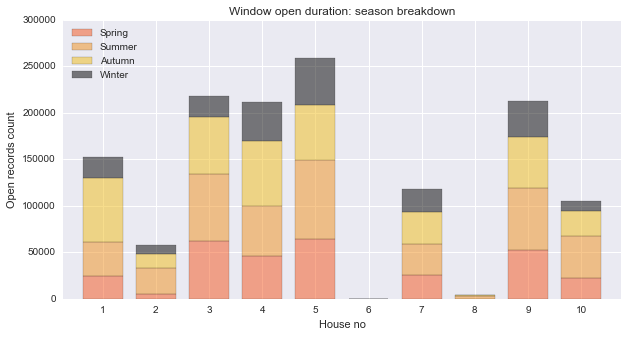

In [3]:
#Stacked bar plot
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df['Spring']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        df['Spring'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Spring',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the mid_score data
        df['Summer'],
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=df['Spring'],
        # with the label mid score
        label='Summer',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Autumn'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['Spring'],df['Summer'])],
        # with the label post score
        label='Autumn',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1BD1A')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Winter'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df['Spring'],df['Summer'],df['Autumn'])],
        # with the label post score
        label='Winter',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='k')
# set the x ticks with names
plt.xticks(tick_pos, df.index)

# Set the label and legends
ax1.set_ylabel("Open records count")
ax1.set_xlabel("House no")
plt.legend(loc='upper left')
plt.title('Window open duration: season breakdown')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

In [98]:
data = df[['Mean','CV']]
data = data.drop(data.index[[5,7]])#drop the rows with too small means
data

In [120]:
from sklearn.preprocessing import scale
data = scale(data)

In [157]:
estimator = KMeans(n_clusters=4)
estimator.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [158]:
labels = estimator.labels_
print estimator.labels_

[1 3 0 0 0 2 0 1]


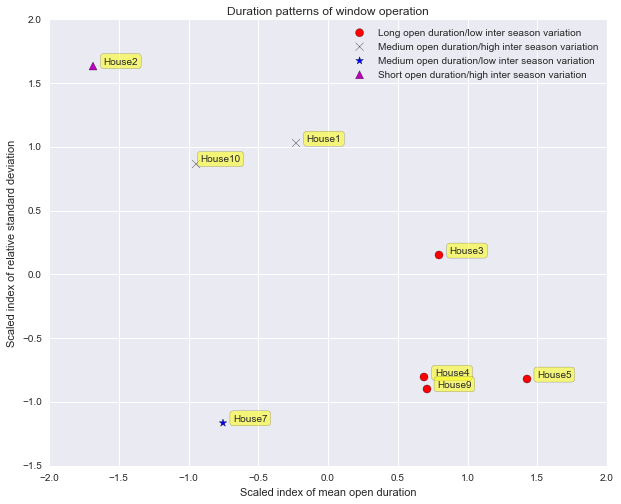

In [160]:
xs = data[:,0]
ys = data[:,1]
plt.figure(figsize=(10,8))
for i in range(0, len(labels)):
    if labels[i] == 0:
        c1 = plt.scatter(xs[i],ys[i],c='r',marker='o',s = 8*8)
    elif labels[i] == 1:
        c2 = plt.scatter(xs[i],ys[i],c='k',marker='x',s = 8*8)
    elif labels[i] == 2:
        c3 = plt.scatter(xs[i],ys[i],c='b',marker='*',s = 8*8)
    elif labels[i] == 3:
        c4 = plt.scatter(xs[i],ys[i],c='m',marker='^',s = 8*8)
plt.legend([c1, c2, c3, c4], ['Long open duration/low inter season variation', 'Medium open duration/high inter season variation','Medium open duration/low inter season variation','Short open duration/high inter season variation'])
plt.xlabel('Scaled index of mean open duration')
plt.ylabel('Scaled index of relative standard deviation')
plt.title('Duration patterns of window operation')

housenum = ['House{0}'.format(i) for i in [1,2,3,4,5,7,9,10]]
for housenum, x, y in zip(housenum, xs, ys):
    plt.annotate(
        housenum, 
        xy = (x, y), xytext = (45, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.5))